<a href="https://colab.research.google.com/github/palm1rr/pca-with-Andrews-curves-and-parallel-coord/blob/main/wine_q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект на тему: МГК и визуализация данных с помощью кривых Эндрю и параллельных коррдинат
автор: Барбарич Егор

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn import decomposition


In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1uj1wfOKXr-ukfoWpSGDSpTW3j_OS_PkV')
df


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

## Предобработка данных


In [ ]:
print(df.shape)
print(df.dtypes.to_string(index=False))
# посмотрели какие типы данных, чтобы понимать чо делать

(6497, 13)
 object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
  int64


In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.dropna(inplace=True)
df = df.drop_duplicates()
df
# дубликатов нет ура туда сюда

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6490    red            6.3             0.510         0.13             2.3   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6490      0.076                 29.0                  40.0  0.99574  3.42   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
6490       0.75     11.0        6  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[5295 rows x 13 columns]

In [ ]:
mapping = {value: index for index, value in enumerate(df['type'].unique())}
df['type'] = df['type'].map(mapping)
df_saved = df.copy()
df

<ipython-input-7-6d586f557d0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].map(mapping)


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.0             0.270         0.36            20.7   
1        0            6.3             0.300         0.34             1.6   
2        0            8.1             0.280         0.40             6.9   
3        0            7.2             0.230         0.32             8.5   
6        0            6.2             0.320         0.16             7.0   
...    ...            ...               ...          ...             ...   
6490     1            6.3             0.510         0.13             2.3   
6491     1            6.8             0.620         0.08             1.9   
6492     1            6.2             0.600         0.08             2.0   
6495     1            5.9             0.645         0.12             2.0   
6496     1            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6490      0.076                 29.0                  40.0  0.99574  3.42   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
6490       0.75     11.0        6  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[5295 rows x 13 columns]

In [ ]:
df.describe()

type  fixed acidity  volatile acidity  citric acid  \
count  5295.000000    5295.000000       5295.000000  5295.000000   
mean      0.255524       7.218008          0.344021     0.318782   
std       0.436197       1.320690          0.168237     0.147112   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.240000   
50%       0.000000       7.000000          0.300000     0.310000   
75%       1.000000       7.700000          0.410000     0.400000   
max       1.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     5295.000000  5295.000000          5295.000000           5295.000000   
mean         5.051029     0.056690            30.046837            114.118225   
std          4.500641     0.036901            17.827151             56.787187   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            16.000000             74.000000   
50%          2.700000     0.047000            28.000000            116.000000   
75%          7.500000     0.066000            41.000000            154.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  5295.000000  5295.000000  5295.000000  5295.000000  5295.000000  
mean      0.994536     3.224385     0.533199    10.550154     5.796034  
std       0.002969     0.160155     0.149851     1.186533     0.880005  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992200     3.110000     0.430000     9.500000     5.000000  
50%       0.994670     3.210000     0.510000    10.400000     6.000000  
75%       0.996780     3.330000     0.600000    11.400000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

In [ ]:
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
df # ручками пронормировали данные

<ipython-input-9-a49e0e77123f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
<ipython-input-9-a49e0e77123f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0.0       0.264463          0.126667     0.216867        0.308282   
1      0.0       0.206612          0.146667     0.204819        0.015337   
2      0.0       0.355372          0.133333     0.240964        0.096626   
3      0.0       0.280992          0.100000     0.192771        0.121166   
6      0.0       0.198347          0.160000     0.096386        0.098160   
...    ...            ...               ...          ...             ...   
6490   1.0       0.206612          0.286667     0.078313        0.026074   
6491   1.0       0.247934          0.360000     0.048193        0.019939   
6492   1.0       0.198347          0.346667     0.048193        0.021472   
6495   1.0       0.173554          0.376667     0.072289        0.021472   
6496   1.0       0.181818          0.153333     0.283133        0.046012   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0      0.059801             0.152778              0.377880  0.267785   
1      0.066445             0.045139              0.290323  0.132832   
2      0.068106             0.100694              0.209677  0.154039   
3      0.081395             0.159722              0.414747  0.163678   
6      0.059801             0.100694              0.299539  0.150183   
...         ...                  ...                   ...       ...   
6490   0.111296             0.097222              0.078341  0.166377   
6491   0.098007             0.093750              0.073733  0.181222   
6492   0.134551             0.107639              0.087558  0.150183   
6495   0.109635             0.107639              0.087558  0.161172   
6496   0.096346             0.059028              0.082949  0.161558   

            pH  sulphates   alcohol   quality  
0     0.217054   0.129213  0.115942  0.500000  
1     0.449612   0.151685  0.217391  0.500000  
2     0.418605   0.123596  0.304348  0.500000  
3     0.364341   0.101124  0.275362  0.500000  
6     0.356589   0.140449  0.231884  0.500000  
...        ...        ...       ...       ...  
6490  0.542636   0.297753  0.434783  0.500000  
6491  0.542636   0.337079  0.217391  0.500000  
6492  0.565891   0.202247  0.362319  0.333333  
6495  0.658915   0.275281  0.318841  0.333333  
6496  0.519380   0.247191  0.434783  0.500000  

[5295 rows x 13 columns]

In [ ]:
df_centered = df.sub(df.mean())
df_centered.dropna(inplace=True)
df_centered # центрировали данные тоже ручками

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    -0.255524      -0.018017         -0.049347     0.024830        0.240015   
1    -0.255524      -0.075868         -0.029347     0.012782       -0.052930   
2    -0.255524       0.072892         -0.042681     0.048927        0.028358   
3    -0.255524      -0.001488         -0.076014     0.000734        0.052898   
6    -0.255524      -0.084133         -0.016014    -0.095652        0.029892   
...        ...            ...               ...          ...             ...   
6490  0.744476      -0.075868          0.110653    -0.113724       -0.042194   
6491  0.744476      -0.034546          0.183986    -0.143844       -0.048329   
6492  0.744476      -0.084133          0.170653    -0.143844       -0.046795   
6495  0.744476      -0.108926          0.200653    -0.119748       -0.046795   
6496  0.744476      -0.100662         -0.022681     0.091095       -0.022255   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0     -0.019418             0.051921              0.128760  0.124617   
1     -0.012774            -0.055718              0.041202 -0.010336   
2     -0.011112            -0.000163             -0.039443  0.010871   
3      0.002177             0.058865              0.165626  0.020510   
6     -0.019418            -0.000163              0.050419  0.007015   
...         ...                  ...                   ...       ...   
6490   0.032077            -0.003635             -0.170779  0.023210   
6491   0.018788            -0.007107             -0.175388  0.038054   
6492   0.055333             0.006782             -0.161563  0.007015   
6495   0.030416             0.006782             -0.161563  0.018004   
6496   0.017127            -0.041829             -0.166171  0.018390   

            pH  sulphates   alcohol   quality  
0    -0.173942  -0.046741 -0.253645  0.033994  
1     0.058616  -0.024269 -0.152196  0.033994  
2     0.027608  -0.052359 -0.065240  0.033994  
3    -0.026655  -0.074831 -0.094225  0.033994  
6    -0.034407  -0.035505 -0.137703  0.033994  
...        ...        ...       ...       ...  
6490  0.151639   0.121798  0.065195  0.033994  
6491  0.151639   0.161124 -0.152196  0.033994  
6492  0.174895   0.026293 -0.007269 -0.132672  
6495  0.267918   0.099326 -0.050747 -0.132672  
6496  0.128384   0.071236  0.065195  0.033994  

[5295 rows x 13 columns]

## МГК



**Ковариация** – это мера того, как изменения одной переменной связаны с изменениями второй переменной.


c
o
v
(
ξ
,
η
)
=
E
[
(
ξ
−
E
[
ξ
]
)
(
η
−
E
[
η
]
)
]


**Ковариационная матрица** — это квадратная матрица, показывающая ковариацию между множеством различных переменных.

Эта матрица является симметричной. Поскольку ковариация случайной величины с самой собой является её дисперсией, на диагонали ковариационной матрицы стоят как раз дисперсии компонент.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'type'),
  Text(0, 1.5, 'fixed acidity'),
  Text(0, 2.5, 'volatile acidity'),
  Text(0, 3.5, 'citric acid'),
  Text(0, 4.5, 'residual sugar'),
  Text(0, 5.5, 'chlorides'),
  Text(0, 6.5, 'free sulfur dioxide'),
  Text(0, 7.5, 'total sulfur dioxide'),
  Text(0, 8.5, 'density'),
  Text(0, 9.5, 'pH'),
  Text(0, 10.5, 'sulphates'),
  Text(0, 11.5, 'alcohol'),
  Text(0, 12.5, 'quality')])

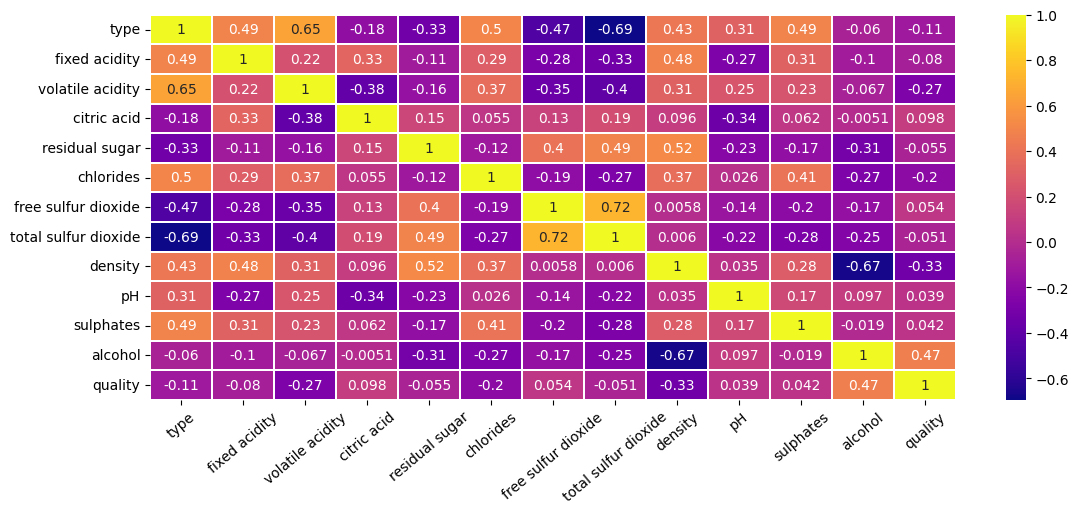

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.heatmap(df_centered.corr(), annot = True, cmap= 'plasma', fmt='.2g', cbar = True, linewidths= .3)
plt.xticks(rotation=40)
plt.yticks(rotation=0)

**Объясненная дисперсия** - это мера того, сколько из общей дисперсии в зависимой переменной объясняется независимыми переменными.

Он рассчитывается как отношение дисперсии прогнозируемых значений к дисперсии фактических значений.

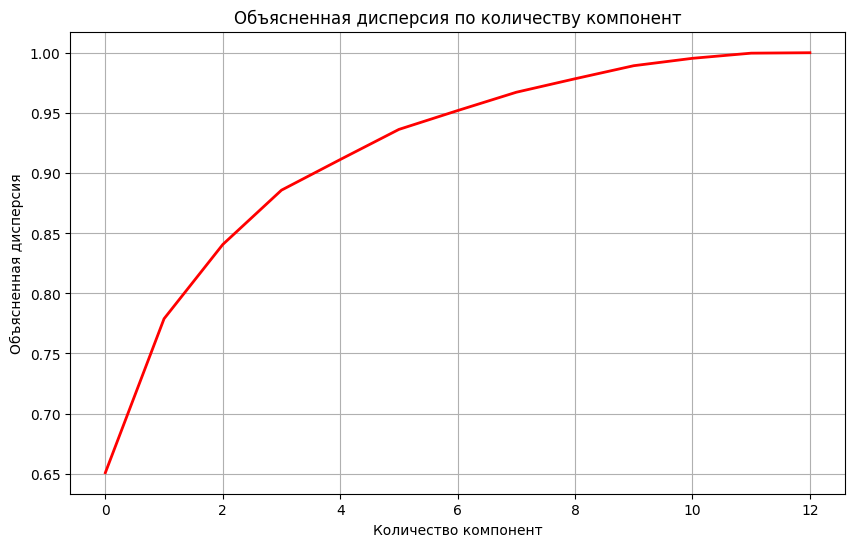

In [ ]:
pca = PCA()
pca_data = pca.fit_transform(df_centered)

# Постройте график объясненной дисперсии
plt.figure(figsize=(10, 6))
plt.grid(1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth = 2, c ='red' )
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('Объясненная дисперсия по количеству компонент')
plt.show()

In [ ]:
# Определите количество компонент для объяснения 90% дисперсии
n_components_to_explain_90 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90)
print(f'Количество компонент для объяснения 90% дисперсии: {n_components_to_explain_90}')

Количество компонент для объяснения 90% дисперсии: 4


In [ ]:
pca.explained_variance_ratio_

array([6.50839011e-01, 1.28017849e-01, 6.17124390e-02, 4.51811586e-02,
       2.54313004e-02, 2.50594069e-02, 1.56689756e-02, 1.52388385e-02,
       1.12099046e-02, 1.08503133e-02, 6.14098047e-03, 4.28753506e-03,
       3.62286460e-04])

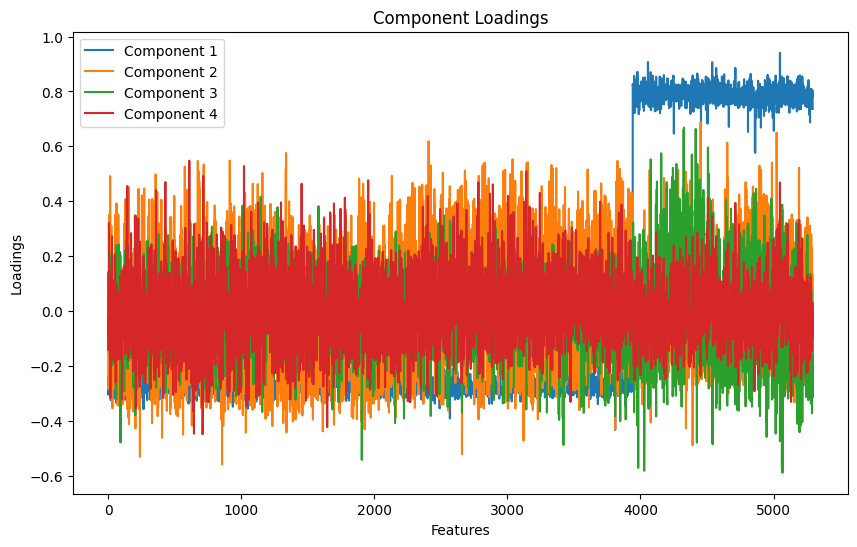

In [ ]:
def plot_loadings(pca_data, n_components):
    plt.figure(figsize=(10, 6))
    for i in range(n_components):
        plt.plot(pca_data[:, i], label=f'Component {i+1}')
    plt.xlabel('Features')
    plt.ylabel('Loadings')
    plt.title('Component Loadings')
    plt.legend()
    plt.show()


plot_loadings(pca_data, n_components_to_explain_90)

Матрица нагрузок  матрица перехода из исходного пространства переменных в пространство главных компонент.

Каждый столбец — проекция соответствующей переменной на новую систему
координат. Число строк —
𝑛
 (размерность пространства данных), число столбцов —
𝑘
 (количество векторов главных компонент, выбранных для проецирования).


In [ ]:
pca = decomposition.PCA(n_components=n_components_to_explain_90)
X = pca.fit_transform(df_centered)
loadings = pd.DataFrame(pca.components_.T* np.sqrt(pca.explained_variance_))
loadings

0         1         2         3
0   0.435381  0.000620  0.006448 -0.011814
1   0.054073 -0.014587  0.074222  0.015421
2   0.074742 -0.012047 -0.031165  0.023045
3  -0.017302 -0.003972  0.058232 -0.004962
4  -0.023766 -0.025866  0.008699 -0.016943
5   0.031073 -0.015994  0.007355 -0.002025
6  -0.030768 -0.013637  0.000303 -0.020805
7  -0.094078 -0.045800 -0.001172 -0.033542
8   0.024425 -0.037774  0.010609 -0.016649
9   0.039791  0.024899 -0.092190 -0.041564
10  0.041695  0.002572  0.012858 -0.017776
11 -0.010324  0.159679 -0.000865  0.048153
12 -0.019303  0.104775  0.038452 -0.086259

In [ ]:
pca.explained_variance_ratio_

array([0.65083901, 0.12801785, 0.06171244, 0.04518116])

In [ ]:
pca = PCA(n_components=n_components_to_explain_90)
principalComponents = pca.fit_transform(df_centered)
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['pred'] = df_centered['quality']
pca_df.dropna(inplace=True)
pca_df

PC1       PC2       PC3       PC4      pred
0    -0.303058 -0.282643  0.141020 -0.140318  0.033994
1    -0.253047 -0.084090 -0.074580 -0.084364  0.033994
2    -0.236548 -0.031004  0.045013 -0.022038  0.033994
3    -0.300347 -0.107842  0.028461 -0.096901  0.033994
6    -0.230629  0.123756  0.131564  0.320898  0.033994
...        ...       ...       ...       ...       ...
5290  0.775436  0.128262 -0.152658 -0.074189 -0.132672
5291  0.803005 -0.046725 -0.154539 -0.144569 -0.132672
5292  0.785628 -0.014947 -0.250944  0.030786 -0.132672
5293  0.801134 -0.037123 -0.314377 -0.028285  0.200661
5294  0.736105  0.131481 -0.042245 -0.092179 -0.132672

[4289 rows x 5 columns]

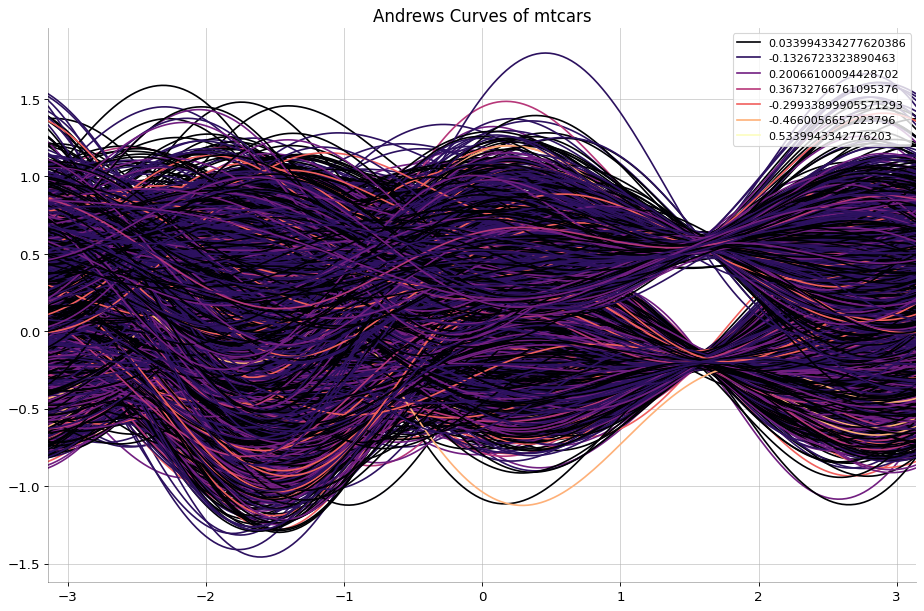

In [ ]:
# Plot
plt.figure(figsize=(14,9), dpi= 80)
andrews_curves(pca_df, 'pred', colormap='magma')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=15)
plt.grid(alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

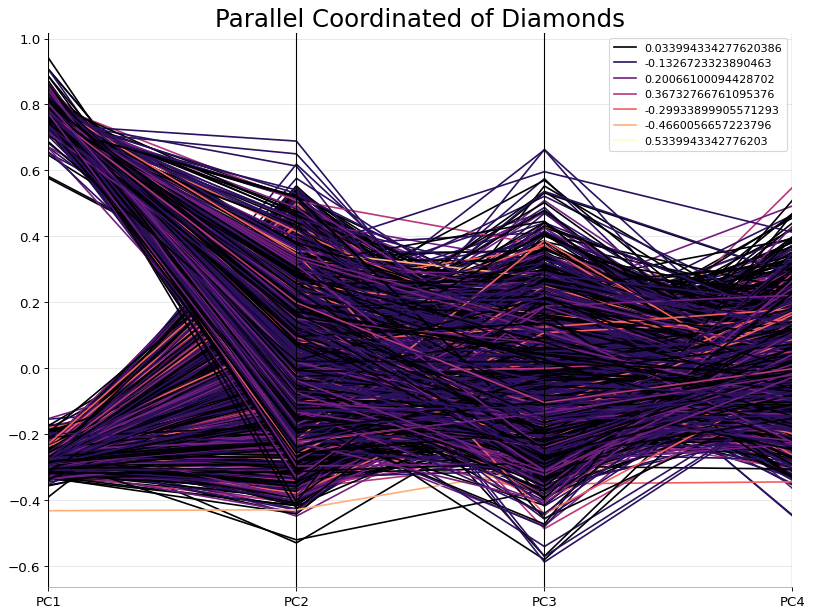

In [ ]:
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(pca_df, 'pred', colormap='magma')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

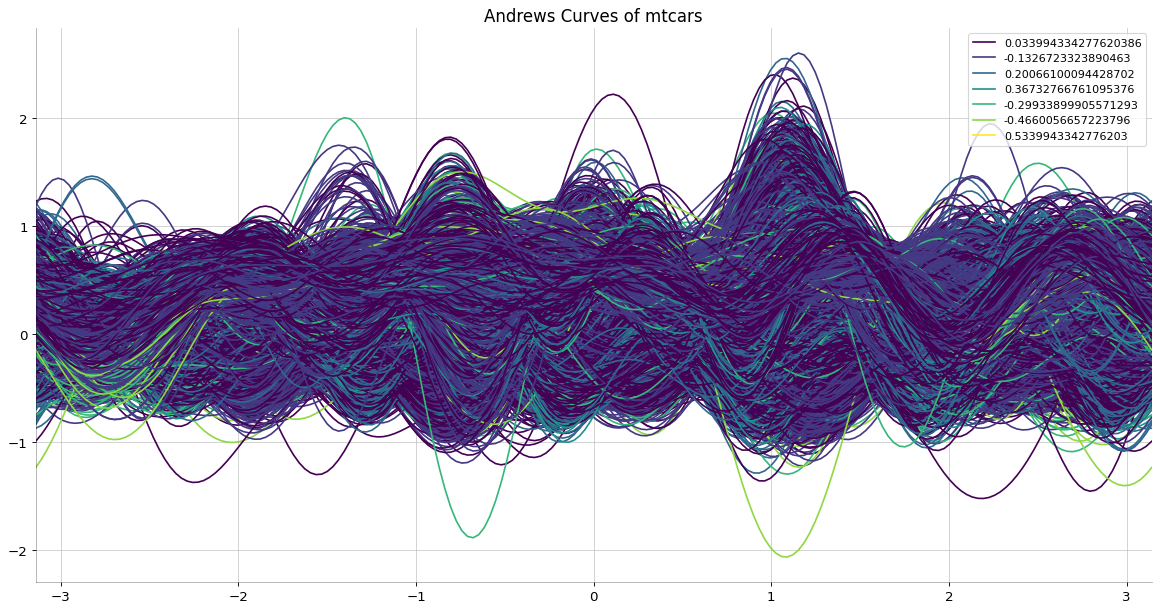

In [ ]:
# Plot
plt.figure(figsize=(18,9), dpi= 80)
andrews_curves(df_centered, 'quality', colormap='viridis')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=15)
plt.grid(alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

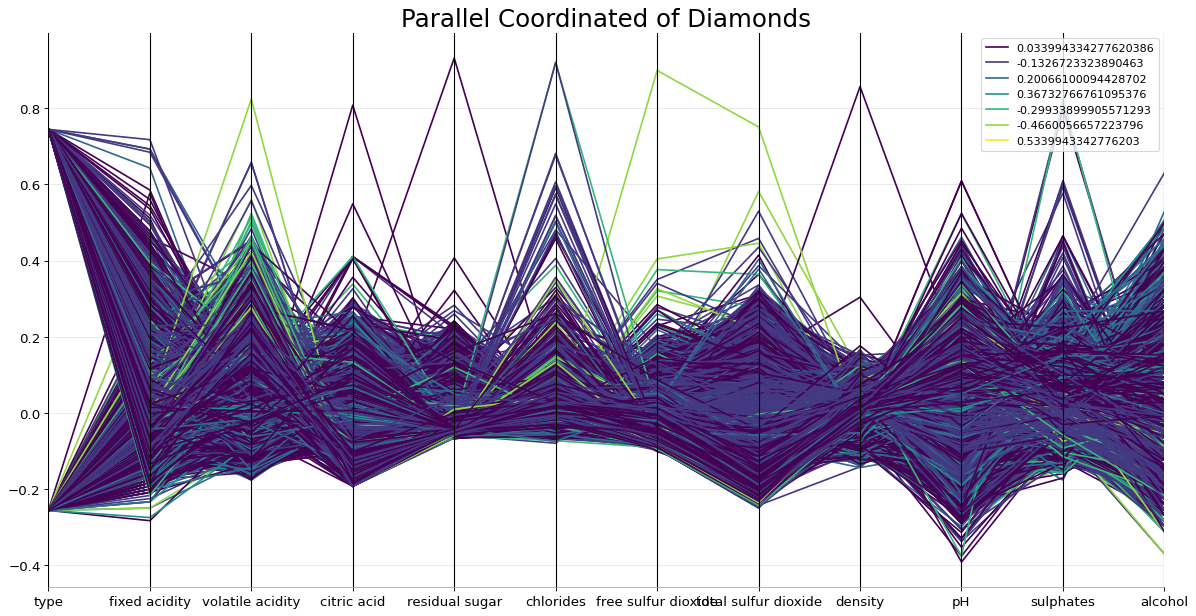

In [ ]:
plt.figure(figsize=(18,9), dpi= 80)
parallel_coordinates(df_centered, 'quality', colormap='viridis')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Функция для расчета среднего пяти строк и записи одной строки
def average_and_reduce(df, step=10):
    rows = []
    for i in range(0, len(df), step):
        row = df.iloc[i:i+step].mean().tolist()
        rows.append(row)
    return pd.DataFrame(rows, columns=df.columns)

# Применяем функцию к датафрейму
reduced_df = average_and_reduce(df)
reduced_df


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0.0       0.298347          0.110667     0.216265        0.074463   
1     0.0       0.253719          0.206000     0.206627        0.050690   
2     0.0       0.287603          0.116000     0.218072        0.070552   
3     0.0       0.248760          0.136000     0.185542        0.061273   
4     0.0       0.233058          0.110667     0.179518        0.058896   
..    ...            ...               ...          ...             ...   
525   1.0       0.302479          0.326333     0.101807        0.024540   
526   1.0       0.253719          0.354667     0.113253        0.028374   
527   1.0       0.234711          0.284667     0.204217        0.044939   
528   1.0       0.224793          0.291333     0.154217        0.033129   
529   1.0       0.201653          0.304667     0.106024        0.026994   

     chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0     0.058638             0.095833              0.271889  0.138809  0.372093   
1     0.057641             0.093750              0.284793  0.120879  0.391473   
2     0.066279             0.093056              0.301613  0.125313  0.433333   
3     0.120100             0.145486              0.352535  0.133989  0.357364   
4     0.074585             0.123264              0.325576  0.116252  0.415504   
..         ...                  ...                   ...       ...       ...   
525   0.112625             0.058333              0.057143  0.172662  0.495349   
526   0.124086             0.080208              0.102074  0.166377  0.510078   
527   0.130233             0.060764              0.086175  0.157046  0.540310   
528   0.100000             0.073958              0.092396  0.149200  0.528682   
529   0.109967             0.093056              0.082028  0.164103  0.565891   

     sulphates   alcohol   quality  
0     0.153933  0.344928  0.466667  
1     0.146629  0.363768  0.550000  
2     0.147753  0.417391  0.483333  
3     0.119101  0.249275  0.450000  
4     0.134270  0.344928  0.500000  
..         ...       ...       ...  
525   0.223596  0.362319  0.450000  
526   0.221910  0.344203  0.433333  
527   0.243258  0.479710  0.466667  
528   0.257865  0.455072  0.466667  
529   0.271910  0.353623  0.433333  

[530 rows x 13 columns]

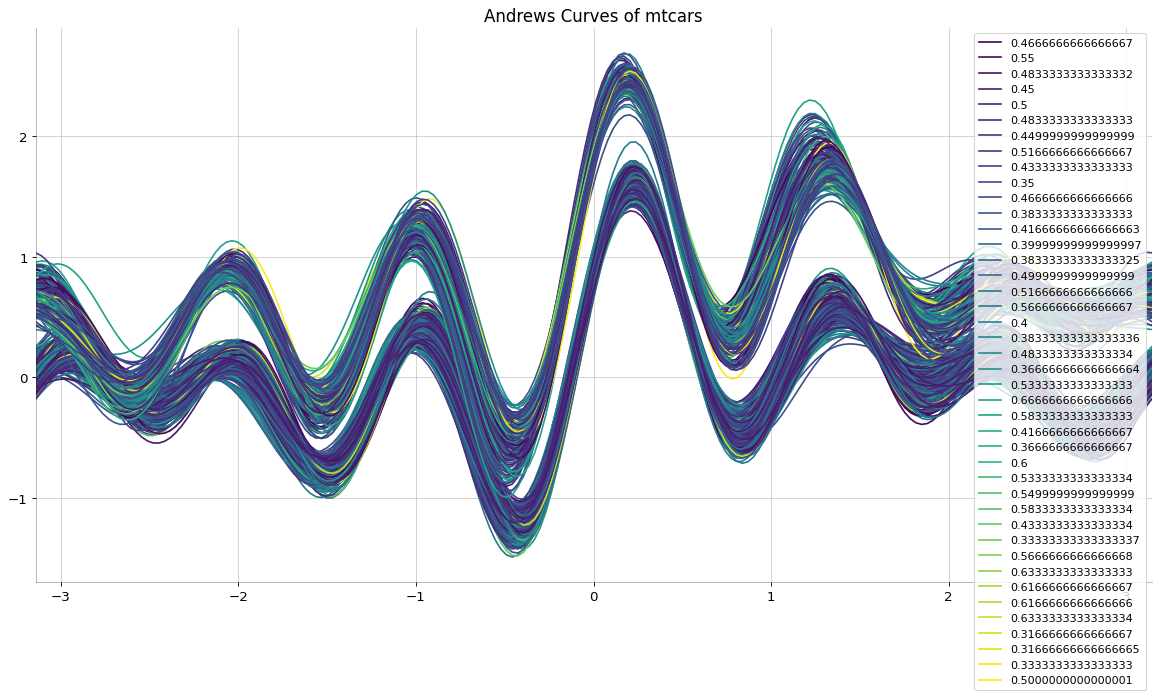

In [ ]:
# Plot
plt.figure(figsize=(18,9), dpi= 80)
andrews_curves(reduced_df, 'quality', colormap='viridis')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=15)
plt.grid(alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

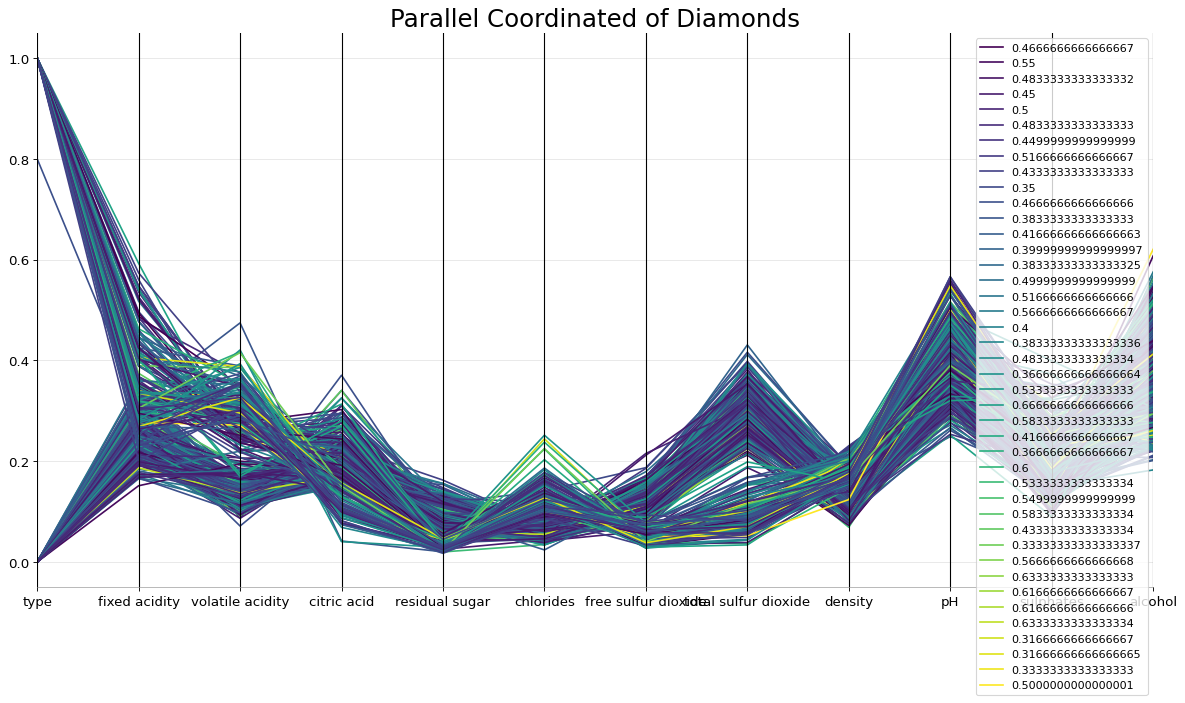

In [ ]:
plt.figure(figsize=(18,9), dpi= 80)
parallel_coordinates(reduced_df, 'quality', colormap='viridis')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Линейная регрессия как показатель точности МГК


In [ ]:
Y = pca_df['pred']
X = pca_df.drop(['pred'], axis = 1)
X['abs term'] = [1 for i in range(len(pca_df))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=100)
X_train

PC1       PC2       PC3       PC4  abs term
581  -0.302198 -0.185360 -0.074460  0.010307         1
5011  0.779904  0.049112 -0.296321  0.075728         1
3957  0.843072 -0.233886  0.118955 -0.005634         1
5113  0.821816 -0.119455 -0.227653  0.071773         1
4411  0.810259 -0.169328  0.027334  0.040152         1
...        ...       ...       ...       ...       ...
5130  0.748329 -0.170565 -0.062305  0.015512         1
2303 -0.225259  0.034994 -0.116543  0.207305         1
433  -0.262792  0.151069 -0.191686 -0.068056         1
95   -0.266218  0.201515  0.038898  0.104208         1
4881  0.765866  0.250234 -0.179376  0.175832         1

[2573 rows x 5 columns]

In [ ]:
A = X_train.values
A = np.matrix(A)
A_plus = np.linalg.inv((A.T @ A)) @ A.T
print('Псевдообратная матрица:\n', A_plus, '\n')
X = A_plus @ Y_train
print('Коэффициенты линейной регресии:\n', X)

Псевдообратная матрица:
 [[-0.00053988  0.00135925  0.00154052 ... -0.00049849 -0.00051845
   0.00130812]
 [-0.00167472  0.00045018 -0.00225593 ...  0.00152217  0.00197452
   0.00234334]
 [-0.00147596 -0.00563543  0.00228425 ... -0.00372238  0.00066001
  -0.00342389]
 [ 0.00032636  0.00182428 -0.00024157 ... -0.00170411  0.00268959
   0.00436666]
 [ 0.00038609  0.00040066  0.00036517 ...  0.00040759  0.00039968
   0.0004054 ]] 

Коэффициенты линейной регресии:
 [-0.01563565 -0.00841415  0.0074295   0.00475069  0.00238383]


In [ ]:
pred = X_test @ X.T
compare = pd.DataFrame({'real':Y_test,'predictions':pred})
compare

real  predictions
1360  0.033994     0.002435
3663  0.033994     0.005318
2935 -0.299339     0.010906
2783  0.033994     0.011010
5247  0.033994    -0.011769
...        ...          ...
4967  0.033994    -0.012864
1185 -0.132672     0.007352
1094 -0.132672     0.009747
4362  0.033994    -0.005863
2850 -0.132672     0.005164

[1716 rows x 2 columns]

In [ ]:
print('MAE = ', mean_absolute_error(Y_test,pred))
print('MSE = ', mean_squared_error(Y_test,pred))

MAE =  0.11764894901006358
MSE =  0.022303489096785447


In [ ]:
Y = df_centered['quality']
X = df_centered.drop(['quality'], axis = 1)
X['abs term'] = [1 for i in range(len(df_centered))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=100)
X_train

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1173 -0.255524       0.015041         -0.082681     0.006758       -0.046795   
2580 -0.255524       0.039834         -0.029347    -0.035411        0.213174   
1459 -0.255524       0.056363         -0.156014     0.103143       -0.008451   
1636 -0.255524       0.048099          0.097319     0.103143        0.029892   
3712 -0.255524      -0.075868         -0.096014    -0.083604        0.085107   
...        ...            ...               ...          ...             ...   
5130  0.744476       0.105950          0.017319    -0.071555       -0.034525   
2303 -0.255524      -0.026282          0.063986    -0.083604        0.103512   
433  -0.255524      -0.001488          0.137319    -0.137820       -0.054464   
95   -0.255524      -0.009753         -0.056014    -0.017338        0.112714   
4881 -0.255524      -0.183306         -0.072681    -0.029387        0.102745   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
1173  -0.019418             0.003310             -0.030226 -0.027687   
2580  -0.006129             0.020671              0.137976  0.100711   
1459  -0.014435            -0.010579              0.043506  0.001231   
1636  -0.022740            -0.003635              0.080373  0.012799   
3712  -0.019418             0.093587              0.103414  0.040946   
...         ...                  ...                   ...       ...   
5130   0.055333            -0.041829             -0.129305  0.066780   
2303  -0.009451            -0.014052              0.027377  0.057140   
433    0.085233            -0.048774              0.084981 -0.014192   
95    -0.021079             0.110948              0.290050  0.045573   
4881  -0.044335             0.013726              0.008944  0.016655   

            pH  sulphates   alcohol  abs term  
1173  0.151639   0.009439  0.123166         1  
2580 -0.018903  -0.018651 -0.021761         1  
1459  0.012104  -0.063595  0.007224         1  
1636 -0.011151  -0.114157 -0.079732         1  
3712 -0.104175   0.003821 -0.195674         1  
...        ...        ...       ...       ...  
5130  0.089624   0.093708 -0.137703         1  
2303  0.004353  -0.029887 -0.210167         1  
433  -0.119679   0.020675 -0.195674         1  
95   -0.142934  -0.063595 -0.195674         1  
4881 -0.119679  -0.018651 -0.166689         1  

[3177 rows x 13 columns]

In [ ]:
A = X_train.values
A = np.matrix(A)
A_plus = np.linalg.inv((A.T @ A)) @ A.T
print('Псевдообратная матрица:\n', A_plus, '\n')
X = A_plus @ Y_train
print('Коэффициенты линейной регресии:\n', X)

Псевдообратная матрица:
 [[-3.20675189e-03  4.92053702e-05 -5.57744513e-04 ... -2.43699250e-03
   3.48717780e-03  8.30265612e-04]
 [ 3.12781194e-03  7.08107282e-03  4.81967227e-04 ...  2.89807807e-03
   3.58083432e-03 -1.10768948e-02]
 [-1.22827282e-03 -2.84745354e-03 -5.19086144e-03 ...  5.06822007e-03
  -2.85614840e-03 -1.91424879e-03]
 ...
 [ 4.01453756e-04 -3.85035757e-04 -5.44720653e-03 ...  3.38183490e-03
  -2.04651991e-03  2.80918481e-03]
 [ 2.78972946e-03  1.74248054e-03  2.55982404e-03 ... -2.25993195e-03
  -2.52729919e-03 -1.87996269e-03]
 [ 3.07373606e-04  3.17521060e-04  3.05484744e-04 ...  3.11494563e-04
   3.17324462e-04  3.11296117e-04]] 

Коэффициенты линейной регресии:
 [ 3.50746449e-02  1.03902552e-01 -3.64217178e-01 -1.32893547e-02
  4.26024527e-01 -8.34811236e-02  2.78347947e-01 -1.51716978e-01
 -5.55766689e-01  9.57049475e-02  2.15733989e-01  2.87805174e-01
  1.39663570e-05]


In [ ]:
pred = X_test @ X.T
compare = pd.DataFrame({'real':Y_test,'predictions':pred})
compare

real  predictions
3678 -0.132672    -0.057011
3505  0.200661     0.091133
2272  0.033994     0.020730
3443  0.033994     0.068157
2256 -0.132672     0.025771
...        ...          ...
5511 -0.132672    -0.011511
3231  0.033994     0.117243
4627  0.033994     0.043526
5237  0.200661     0.081187
4166  0.200661     0.078835

[2118 rows x 2 columns]

In [ ]:
print('MAE = ', mean_absolute_error(Y_test,pred))
print('MSE = ', mean_squared_error(Y_test,pred))

MAE =  0.09476192508146801
MSE =  0.015319348545664309
